In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER,LATITUDE_FORMATTER
import os,errno
import sys
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
import pandas as pd
import datetime as dt
from scipy.ndimage.measurements import label
from math import sin, cos, sqrt, atan2, radians
import geopy.distance
%matplotlib inline

dir2='/thorncroftlab_rit/ahenny/rain/'
dir1='/thorncroftlab_rit/ahenny/rain/US/ghcnd_all/'
dir='/thorncroftlab_rit/ahenny/rain/DISSERTATION_SCRIPTS_RESULTS/'
#This script generates plots of trends in EP day characteristics by weather type, independent of EP day frequency

In [3]:
#@author: Michael Schramm on GitHub
#This function is derived from code originally posted by Sat Kumar Tomer
#(satkumartomer@gmail.com)
#See also: http://vsp.pnnl.gov/help/Vsample/Design_Trend_Mann_Kendall.htm

from scipy.stats import norm
import scipy.stats as st
def mk_test(x, alpha=0.05):
    n = len(x)

    # calculate S
    s = 0
    for k in range(n-1):
        for j in range(k+1, n):
            s += np.sign(x[j] - x[k])

    # calculate the unique data
    unique_x, tp = np.unique(x, return_counts=True)
    g = len(unique_x)

    # calculate the var(s)
    if n == g:  # there is no tie
        var_s = (n*(n-1)*(2*n+5))/18
    else:  # there are some ties in data
        var_s = (n*(n-1)*(2*n+5) - np.sum(tp*(tp-1)*(2*tp+5)))/18

    if s > 0:
        z = (s - 1)/np.sqrt(var_s)
    elif s < 0:
        z = (s + 1)/np.sqrt(var_s)
    else: # s == 0:
        z = 0

    # calculate the p_value
    p = 2*(1-norm.cdf(abs(z)))  # two tail test
    h = abs(z) > norm.ppf(1-alpha/2)

    if (z < 0) and h:
        trend = 'decreasing'
    elif (z > 0) and h:
        trend = 'increasing'
    else:
        trend = 'no trend'

    return trend, h, p, z

In [ ]:
ds=xr.open_dataset(dir+'ls_extreme_rain_taiwan.nc')
p=ds['large_scale_extreme_rain_all']#total rainfall on ER days
threshold=ds['threshold_99']
dates_unique=ds.large_scale_extreme_days.values
dates_unique=pd.DatetimeIndex(dates_unique)
print(dates_unique)

dw1=xr.open_dataset(dir+'era_5_mys_ivtx_taiwan.nc')
ivtx=dw1['p71.162']
dw2=xr.open_dataset(dir+'era_5_mys_ivty_taiwan.nc')
ivty=dw2['p72.162']
ds2=xr.open_dataset(dir+'era_5_mys_mslp_taiwan.nc')
slp=ds2.msl

ivtx=ivtx.sel(longitude=np.arange(70,175,0.25))
ivty=ivty.sel(longitude=np.arange(70,175,0.25))
slp=slp.sel(longitude=np.arange(70,175,0.25))

print(slp)

lon_range=np.arange(70,170,0.25)
lat_range=np.arange(4,50,0.25)

if 1==1:
    ds3=xr.open_dataset(dir+'era_5_mys_q_850_taiwan.nc')
    lon_initial=ds3.longitude.values
    q_concat=ds3['q'].sel(latitude=lat_range,longitude=lon_range)

    ds4=xr.open_dataset(dir+'era_5_mys_u_850_taiwan.nc')
    u_concat=ds4['u'].sel(latitude=lat_range,longitude=lon_range)

    ds5=xr.open_dataset(dir+'era_5_mys_v_850_taiwan.nc')
    v_concat=ds5['v'].sel(latitude=lat_range,longitude=lon_range)
    
    ds6=xr.open_dataset(dir+'era_5_mys_z1000_taiwan.nc')
    z_1000=ds6.z
    
    ds7=xr.open_dataset(dir+'era_5_mys_z500_taiwan.nc')
    z_500=ds7.z

ds4=xr.open_dataset(dir+'taiwan_ep_days_stats_var95_newar.nc')
ar_yesno4=ds4['ar_yesno'].values.tolist()
ivt_yesno4=ds4['ivt_yesno'].values.tolist()
tc_yesno4=ds4['tc_yesno'].values.tolist()
other_yesno4=ds4['other_yesno'].values.tolist()
tc_linked_ar_yesno4=ds4['tc_linked_ar_yesno'].values.tolist()
tc_linked_ivt_yesno4=ds4['tc_linked_ivt_yesno'].values.tolist()
tc_remnant_linked_ivt_yesno4=ds4['ivt_tc_remnants_yesno'].values.tolist()
tc_remnant_ar_combo_yesno4=ds4['ar_tc_remnant_combo_yesno'].values.tolist()
tc_remnant_linked_ar_yesno4=ds4['tc_remnant_linked_ar_yesno'].values.tolist()
tc_remnants_yesno4=ds4['tc_remnants_yesno'].values.tolist()
tc_ar_combo_yesno4=ds4['tc_ar_combo_yesno'].values.tolist()
print(sum(ar_yesno4))

In [ ]:
ds5=xr.open_dataset(dir+'taiwan_ar_climo_mys.nc')
print(ds5)
ar=ds5.ar
tc_trop=ds5.tc_trop
tc_nontrop=ds5.tc_nontrop
labeled=ds5['labeled']
print(ar.time)

In [6]:
#Retrieve login credintial for RDA.
import requests
from pathlib import Path
HOME = str(Path.home())
credFile = open(HOME+'/.rdarc','r')
userId, pw = credFile.read().split()
session = requests.Session()
session.auth = (userId, pw)

In [ ]:
print(slp)
print(ivtx)

In [ ]:
zipped_t1=list(zip(dates_unique,ar_yesno4))#ar-related = green
zipped_t2=list(zip(dates_unique,tc_linked_ar_yesno4))
zipped_t3=list(zip(dates_unique,tc_remnant_linked_ar_yesno4))
zipped_t4=list(zip(dates_unique,tc_yesno4))#tc-related = blue
zipped_t5=list(zip(dates_unique,tc_ar_combo_yesno4))
zipped_t6=list(zip(dates_unique,tc_remnant_ar_combo_yesno4))
zipped_t7=list(zip(dates_unique,tc_remnants_yesno4))
zipped_t8=list(zip(dates_unique,ivt_yesno4))#other IVT-related = grey
zipped_t9=list(zip(dates_unique,tc_linked_ivt_yesno4))
zipped_t10=list(zip(dates_unique,tc_remnant_linked_ivt_yesno4))
zipped_t11=list(zip(dates_unique,other_yesno4))#unspecified = brown

dates_t1=[x[0] for x in zipped_t1 if x[1]==1]
dates_t2=[x[0] for x in zipped_t2 if x[1]==1]
dates_t3=[x[0] for x in zipped_t3 if x[1]==1]
dates_t4=[x[0] for x in zipped_t4 if x[1]==1]
dates_t5=[x[0] for x in zipped_t5 if x[1]==1]
dates_t6=[x[0] for x in zipped_t6 if x[1]==1]
dates_t7=[x[0] for x in zipped_t7 if x[1]==1]
dates_t8=[x[0] for x in zipped_t8 if x[1]==1]
dates_t9=[x[0] for x in zipped_t9 if x[1]==1]
dates_t10=[x[0] for x in zipped_t10 if x[1]==1]
dates_t11=[x[0] for x in zipped_t11 if x[1]==1]

dates_t1=[pd.to_datetime(x)+dt.timedelta(hours=0) for x in dates_t1]
dates_t2=[pd.to_datetime(x)+dt.timedelta(hours=0) for x in dates_t2]
dates_t3=[pd.to_datetime(x)+dt.timedelta(hours=0) for x in dates_t3]
dates_t4=[pd.to_datetime(x)+dt.timedelta(hours=0) for x in dates_t4]
dates_t5=[pd.to_datetime(x)+dt.timedelta(hours=0) for x in dates_t5]
dates_t6=[pd.to_datetime(x)+dt.timedelta(hours=0) for x in dates_t6]
dates_t7=[pd.to_datetime(x)+dt.timedelta(hours=0) for x in dates_t7]
dates_t8=[pd.to_datetime(x)+dt.timedelta(hours=0) for x in dates_t8]
dates_t9=[pd.to_datetime(x)+dt.timedelta(hours=0) for x in dates_t9]
dates_t10=[pd.to_datetime(x)+dt.timedelta(hours=0) for x in dates_t10]
dates_t11=[pd.to_datetime(x)+dt.timedelta(hours=0) for x in dates_t11]

years_t1=[x.year for x in dates_t1]
years_t2=[x.year for x in dates_t2]
years_t3=[x.year for x in dates_t3]
years_t4=[x.year for x in dates_t4]
years_t5=[x.year for x in dates_t5]
years_t6=[x.year for x in dates_t6]
years_t7=[x.year for x in dates_t7]
years_t8=[x.year for x in dates_t8]
years_t9=[x.year for x in dates_t9]
years_t10=[x.year for x in dates_t10]
years_t11=[x.year for x in dates_t11]

dates_ar=dates_t1+dates_t2+dates_t3
dates_tc=dates_t4+dates_t5+dates_t6+dates_t7
dates_other=dates_t8+dates_t9+dates_t10+dates_t11
print(dates_ar)
dates_ar=[x+dt.timedelta(days=0) for x in dates_ar]
print(dates_ar)

years_ar=years_t1+years_t2+years_t3
years_tc=years_t4+years_t5+years_t6+years_t7
years_other=years_t8+years_t9+years_t10+years_t11

years_ar=np.sort(years_ar).tolist()
years_tc=np.sort(years_tc).tolist()
years_other=np.sort(years_other).tolist()

years_all=[x.year for x in dates_unique]

for i in range(len(dates_tc)):
    print(i)
    date=dates_tc[i]+dt.timedelta(hours=-12)
    date_range=[date+dt.timedelta(hours=6*x) for x in range(4)]
    print(date_range)
    date_range=pd.DatetimeIndex(date_range).values#date range for IVT selection

    #if len([x for x in date_range if pd.to_datetime(x) in pd.DatetimeIndex(ivt_mag.time.values)])==4:
    if 1==1:
        print('YES')
        
        ivtx_sel=ivtx.sel(time=date_range)
        ivtx_mean=ivtx_sel.mean(dim='time',skipna=True)
        ivty_sel=ivty.sel(time=date_range)
        ivty_mean=ivty_sel.mean(dim='time',skipna=True)
        
        ivt_mag_sel=np.sqrt(ivtx_sel**2+ivty_sel**2)
        ivt_mag_mean=ivt_mag_sel.mean(dim='time',skipna=True)
        u_sel=u_concat.sel(time=date_range)
        u_mean=u_sel.mean(dim='time',skipna=True)
        v_sel=v_concat.sel(time=date_range)
        v_mean=v_sel.mean(dim='time',skipna=True)

        slp_sel=slp.sel(time=date_range)
        slp_mean=slp_sel.mean(dim='time',skipna=True)

        z_1000_sel=z_1000.sel(time=date_range)
        z_500_sel=z_500.sel(time=date_range)
        thickness_sel=z_500_sel-z_1000_sel
        thickness_mean=thickness_sel.mean(dim='time',skipna=True)
        
        ar_sel=ar.sel(time=date_range)
        ar_mean=ar_sel.mean(dim='time',skipna=True)
    
    else:
        lat_range=np.arange(-15,65,0.25)
        lon_range=np.arange(360-120,360-40,0.25)  

        year=date.year
        month=date.month
        day=date.day
        hour=date.hour

        if month<10:
            month_str='0'+str(month)
        else:
            month_str=str(month)

        if day<10:
            day_str='0'+str(day)
        else:
            day_str=str(day)

        if month==5:
            length_str='31'
        if month==6:
            length_str='30'
        if month==7:
            length_str='31'

        urlivtx='https://rda.ucar.edu/thredds/dodsC/files/g/ds633.0/e5.oper.an.vinteg/'+str(year)+month_str+'/e5.oper.an.vinteg.162_071_viwve.ll025sc.'+str(year)+month_str+'0100_'+str(year)+month_str+length_str+'23.nc'
        urlivty='https://rda.ucar.edu/thredds/dodsC/files/g/ds633.0/e5.oper.an.vinteg/'+str(year)+month_str+'/e5.oper.an.vinteg.162_072_viwvn.ll025sc.'+str(year)+month_str+'0100_'+str(year)+month_str+length_str+'23.nc'
        urlslp='https://rda.ucar.edu/thredds/dodsC/files/g/ds633.0/e5.oper.an.sfc/'+str(year)+month_str+'/e5.oper.an.sfc.128_151_msl.ll025sc.'+str(year)+month_str+'0100_'+str(year)+month_str+length_str+'23.nc'

        store_ivtx=xr.backends.PydapDataStore.open(urlivtx, session=session)
        store_ivty=xr.backends.PydapDataStore.open(urlivty, session=session)
        store_slp=xr.backends.PydapDataStore.open(urlslp, session=session)

        ds_ivtx=xr.open_dataset(store_ivtx)
        ds_ivty=xr.open_dataset(store_ivty)
        ds_slp=xr.open_dataset(store_slp)
        
        ivtx_download=ds_ivtx['VIWVE'].sel(time=date_range,latitude=ivtx.latitude.values,longitude=ivtx.longitude.values)
        ivty_download=ds_ivty['VIWVN'].sel(time=date_range,latitude=ivtx.latitude.values,longitude=ivtx.longitude.values)
        slp_download=ds_slp['MSL'].sel(time=date_range,latitude=slp.latitude.values,longitude=slp.longitude.values)

        ivtx_mean=ivtx_download.mean(dim='time',skipna=True)
        ivty_mean=ivty_download.mean(dim='time',skipna=True)
        slp_mean=slp_download.mean(dim='time',skipna=True)


    if i==0:
        ivt_days=ivt_mag_mean
        ivtx_days=ivtx_mean
        ivty_days=ivty_mean
        #u_days=u_mean
        #v_days=v_mean
        slp_days=slp_mean
        thickness_days=thickness_mean
        ar_days=ar_mean
        
        
    else:
        ivt_days=xr.concat([ivt_days,ivt_mag_mean],dim='time')
        ivtx_days=xr.concat([ivtx_days,ivtx_mean],dim='time')
        ivty_days=xr.concat([ivty_days,ivty_mean],dim='time')
        #u_days=xr.concat([u_days,u_mean],dim='time')
        #v_days=xr.concat([v_days,v_mean],dim='time')
        slp_days=xr.concat([slp_days,slp_mean],dim='time')
        thickness_days=xr.concat([thickness_days,thickness_mean],dim='time')
        ar_days=xr.concat([ar_days,ar_mean],dim='time')

In [ ]:
years_select=years_tc
ar_days=ar_days.fillna(0)
import scipy.stats as st
if 1==1:
    slopes_array_ivt=xr.zeros_like(ivtx_days[0,:,:])
    sigs_array_ivt=xr.zeros_like(ivtx_days[0,:,:])
    slopes_array_ivtx=xr.zeros_like(ivtx_days[0,:,:])
    sigs_array_ivtx=xr.zeros_like(ivtx_days[0,:,:])
    slopes_array_ivty=xr.zeros_like(ivty_days[0,:,:])
    sigs_array_ivty=xr.zeros_like(ivty_days[0,:,:])
    slopes_array_slp=xr.zeros_like(slp_days[0,:,:])
    sigs_array_slp=xr.zeros_like(slp_days[0,:,:])
    slopes_array_thickness=xr.zeros_like(thickness_days[0,:,:])
    sigs_array_thickness=xr.zeros_like(thickness_days[0,:,:])
    slopes_array_ar=xr.zeros_like(ar_days[0,:,:])
    sigs_array_ar=xr.zeros_like(ar_days[0,:,:])
    
    for i in range(ar.latitude.size):
        print(i)
        for j in range(ar.longitude.size):
            time_series=ar_days[:,i,j].values.tolist()
            linreg=st.linregress(years_select,time_series)
            slope=linreg[0]
            p_value=linreg[3]
            slopes_array_ar[i,j]=slope
            sigs_array_ar[i,j]=p_value
            
    for i in range(ivtx_days.latitude.size):
        print(i)
        for j in range(ivtx_days.longitude.size):
            time_series=ivt_days[:,i,j].values.tolist()
            linreg=st.linregress(years_select,time_series)
            slope=linreg[0]
            p_value=linreg[3]
            slopes_array_ivt[i,j]=slope
            sigs_array_ivt[i,j]=p_value
            
            time_series=ivtx_days[:,i,j].values.tolist()
            linreg=st.linregress(years_select,time_series)
            slope=linreg[0]
            p_value=linreg[3]
            slopes_array_ivtx[i,j]=slope
            sigs_array_ivtx[i,j]=p_value
            
            time_series=ivty_days[:,i,j].values.tolist()
            linreg=st.linregress(years_select,time_series)
            slope=linreg[0]
            p_value=linreg[3]
            slopes_array_ivty[i,j]=slope
            sigs_array_ivty[i,j]=p_value
            
    for i in range(slp_days.latitude.size):
        print(i)
        for j in range(slp_days.longitude.size):
            time_series=slp_days[:,i,j].values.tolist()
            linreg=st.linregress(years_select,time_series)
            slope=linreg[0]
            p_value=linreg[3]
            slopes_array_slp[i,j]=slope
            sigs_array_slp[i,j]=p_value
            
    for i in range(thickness_days.latitude.size):
        print(i)
        for j in range(thickness_days.longitude.size):
            time_series=thickness_days[:,i,j].values.tolist()
            linreg=st.linregress(years_select,time_series)
            slope=linreg[0]
            p_value=linreg[3]
            slopes_array_thickness[i,j]=slope
            sigs_array_thickness[i,j]=p_value            

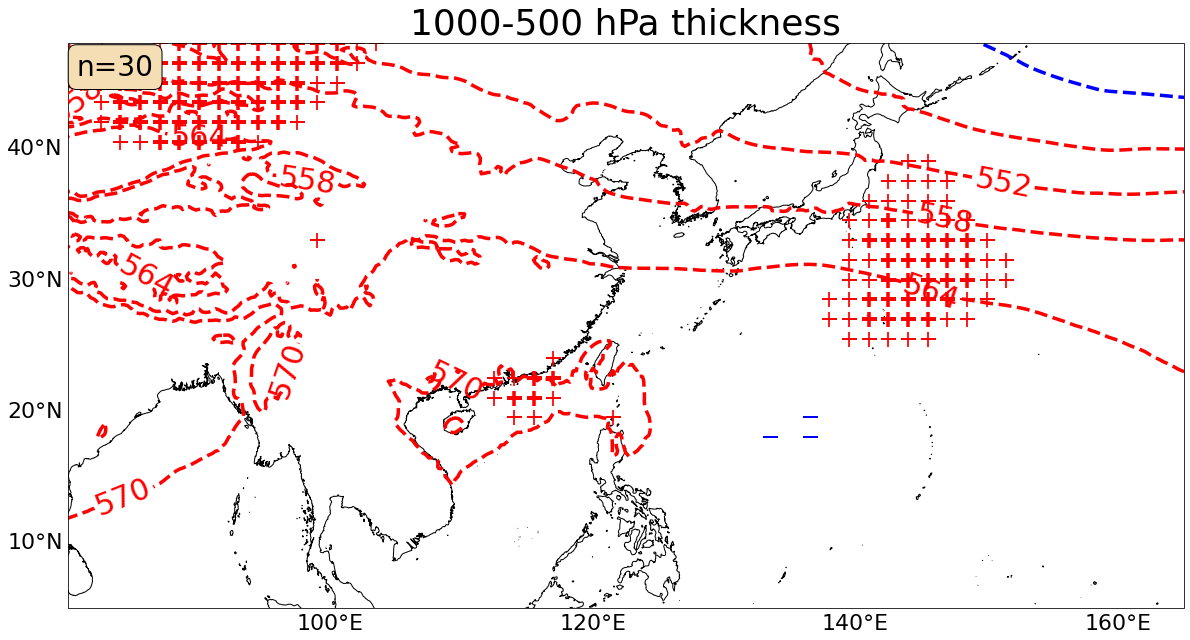

In [50]:
import matplotlib as mpl
month_dict={'1':'January','2':'February','3':'March','4':'April','5':'May','6':'June','7':'July','8':'August','9':'September','10':'October','11':'November','12':'December'}    
proj_map = ccrs.PlateCarree()
fig = plt.figure(figsize=(20,12))
ax=plt.subplot(1,1,1,projection=proj_map)
ax.coastlines(resolution='10m')
countries = cfeature.NaturalEarthFeature(category='cultural',name='admin_0_boundary_lines_land',scale='50m',facecolor='none')
ax.add_feature(countries)
ax.set_extent([80,165,5,48],crs=ccrs.PlateCarree())

# Define gridline locations and draw the lines using cartopy's built-in gridliner:

xticks = [85,95,105,115,125,135,145,155]
yticks = [15,25,35],
ax.tick_params(labelsize=20)
g1=ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,alpha=0)
g1.xformatter=LONGITUDE_FORMATTER
g1.yformatter=LATITUDE_FORMATTER
g1.xlabel_style={'size':22,'color':'k'}
g1.ylabel_style={'size':22,'color':'k'}
g1.top_labels=False
g1.right_labels=False
Y=6
for i in range(int(slopes_array_thickness.longitude.size/Y)):
    for j in range(int(slopes_array_thickness.latitude.size/Y)):
        if sigs_array_thickness[Y*j,Y*i]<=0.05:
            if slopes_array_thickness[Y*j,Y*i].values>0:
                ax.plot(slopes_array_thickness.longitude.values[Y*i],slopes_array_thickness.latitude.values[Y*j],transform=ccrs.PlateCarree(),marker='+',color='r',mew=3.5,markersize=15,markerfacecolor="None")
            else:
                ax.plot(slopes_array_thickness.longitude.values[Y*i],slopes_array_thickness.latitude.values[Y*j],transform=ccrs.PlateCarree(),marker='_',color='b',mew=3.5,markersize=15,markerfacecolor="None")
        elif sigs_array_thickness[Y*j,Y*i]<=0.10:
            if slopes_array_thickness[Y*j,Y*i].values>0:
                ax.plot(slopes_array_thickness.longitude.values[Y*i],slopes_array_thickness.latitude.values[Y*j],transform=ccrs.PlateCarree(),marker='+',color='r',mew=1.75,markersize=15,markerfacecolor="None")
            else:
                ax.plot(slopes_array_thickness.longitude.values[Y*i],slopes_array_thickness.latitude.values[Y*j],transform=ccrs.PlateCarree(),marker='_',color='b',mew=1.75,markersize=15,markerfacecolor="None")

slp_means_all=slp_days.mean(dim='time',skipna=True)
thickness_mean=thickness_days.mean(dim='time',skipna=True)

c1=ax.contour(thickness_mean.longitude,thickness_mean.latitude,thickness_mean/100.,linewidths=3.5,linestyles='--',transform=ccrs.PlateCarree(),colors=['b','b','b','b','b','r','r','r','r','r','r'],levels=np.arange(516,580,6))
plt.clabel(c1,fmt='%.00f',fontsize=30)

ax.set_title('1000-500 hPa thickness',fontsize=36,pad=10)
X=4
#q=ax.quiver(u_mean.longitude[0::X].values,u_mean.latitude[0::X].values,u_mean[0::X,0::X].values,v_mean[0::X,0::X].values,transform=ccrs.PlateCarree(),units='inches',scale=40,width=0.015,alpha=0.5)
#ax.quiverkey(q,0.94,1.01,10,'10 m/s',fontproperties={'size':16})
      
mpl.rcParams['hatch.linewidth']=0.01
props = dict(boxstyle='round', facecolor='wheat', alpha=1.0)
ax.text(0.008, 0.9825,'n='+str(len(dates_tc)), transform=ax.transAxes, fontsize=28,verticalalignment='top', bbox=props,zorder=30)
plt.show()

In [47]:
fig.savefig(dir+'taiwan_paper_event_changes_1.png')

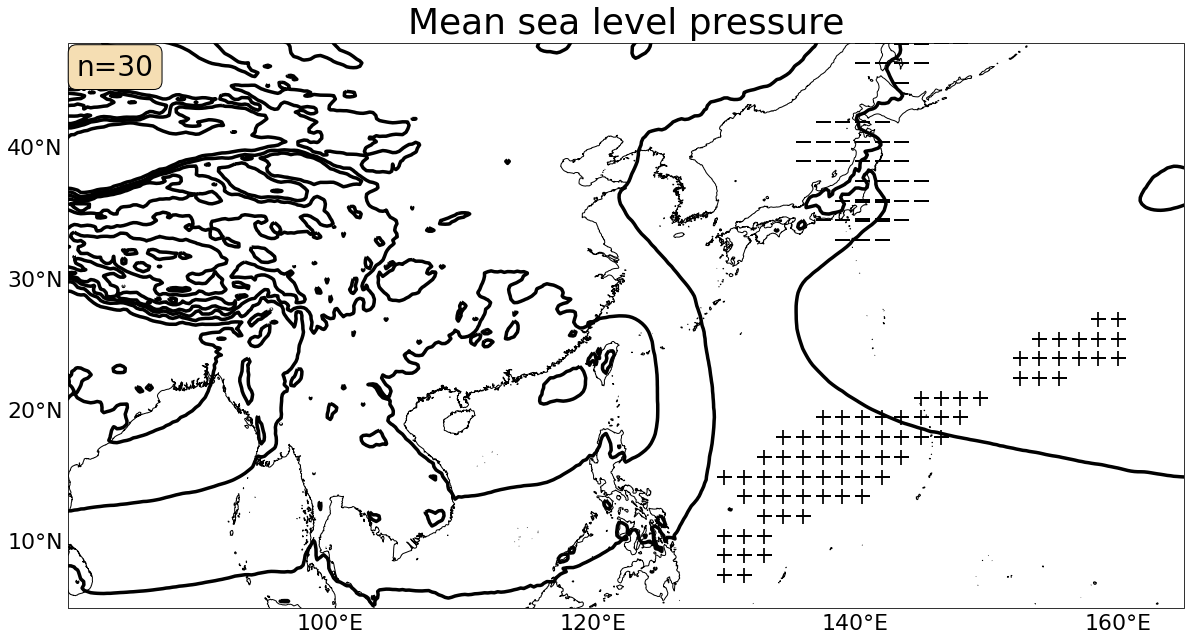

In [51]:
import matplotlib as mpl
month_dict={'1':'January','2':'February','3':'March','4':'April','5':'May','6':'June','7':'July','8':'August','9':'September','10':'October','11':'November','12':'December'}    
proj_map = ccrs.PlateCarree()
fig = plt.figure(figsize=(20,12))
ax=plt.subplot(1,1,1,projection=proj_map)
ax.coastlines(resolution='10m')
countries = cfeature.NaturalEarthFeature(category='cultural',name='admin_0_boundary_lines_land',scale='50m',facecolor='none')
ax.add_feature(countries)
ax.set_extent([80,165,5,48],crs=ccrs.PlateCarree())

# Define gridline locations and draw the lines using cartopy's built-in gridliner:

xticks = [85,95,105,115,125,135,145,155]
yticks = [15,25,35],
ax.tick_params(labelsize=20)
g1=ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,alpha=0)
g1.xformatter=LONGITUDE_FORMATTER
g1.yformatter=LATITUDE_FORMATTER
g1.xlabel_style={'size':22,'color':'k'}
g1.ylabel_style={'size':22,'color':'k'}
g1.top_labels=False
g1.right_labels=False
Y=6
for i in range(int(slopes_array_slp.longitude.size/Y)):
    for j in range(int(slopes_array_slp.latitude.size/Y)):
        if sigs_array_slp[Y*j,Y*i]<=0.05:
            if slopes_array_slp[Y*j,Y*i].values>0:
                ax.plot(slopes_array_slp.longitude.values[Y*i],slopes_array_slp.latitude.values[Y*j],transform=ccrs.PlateCarree(),marker='+',color='k',mew=3.5,markersize=15,markerfacecolor="None")
            else:
                ax.plot(slopes_array_slp.longitude.values[Y*i],slopes_array_slp.latitude.values[Y*j],transform=ccrs.PlateCarree(),marker='_',color='k',mew=3.5,markersize=15,markerfacecolor="None")
        elif sigs_array_slp[Y*j,Y*i]<=0.10:
            if slopes_array_slp[Y*j,Y*i].values>0:
                ax.plot(slopes_array_slp.longitude.values[Y*i],slopes_array_slp.latitude.values[Y*j],transform=ccrs.PlateCarree(),marker='+',color='k',mew=1.75,markersize=15,markerfacecolor="None")
            else:
                ax.plot(slopes_array_slp.longitude.values[Y*i],slopes_array_slp.latitude.values[Y*j],transform=ccrs.PlateCarree(),marker='_',color='k',mew=1.75,markersize=15,markerfacecolor="None")

slp_means_all=slp_days.mean(dim='time',skipna=True)

c=ax.contour(slp_means_all.longitude,slp_means_all.latitude,slp_means_all/100.,linewidths=3.5,transform=ccrs.PlateCarree(),colors='k',levels=np.arange(960,1040,4))

plt.clabel(c1,fmt='%.00f',fontsize=30)

ax.set_title('Mean sea level pressure',fontsize=36,pad=10)
X=4
#q=ax.quiver(u_mean.longitude[0::X].values,u_mean.latitude[0::X].values,u_mean[0::X,0::X].values,v_mean[0::X,0::X].values,transform=ccrs.PlateCarree(),units='inches',scale=40,width=0.015,alpha=0.5)
#ax.quiverkey(q,0.94,1.01,10,'10 m/s',fontproperties={'size':16})
      
mpl.rcParams['hatch.linewidth']=0.01
props = dict(boxstyle='round', facecolor='wheat', alpha=1.0)
ax.text(0.008, 0.9825,'n='+str(len(dates_tc)), transform=ax.transAxes, fontsize=28,verticalalignment='top', bbox=props,zorder=30)
plt.show()

In [20]:
fig.savefig(dir+'taiwan_paper_event_changes_2.png')

In [ ]:
print(slopes_array_ar.min().values)
print(ar_days.max().values)
print(ivt_days)

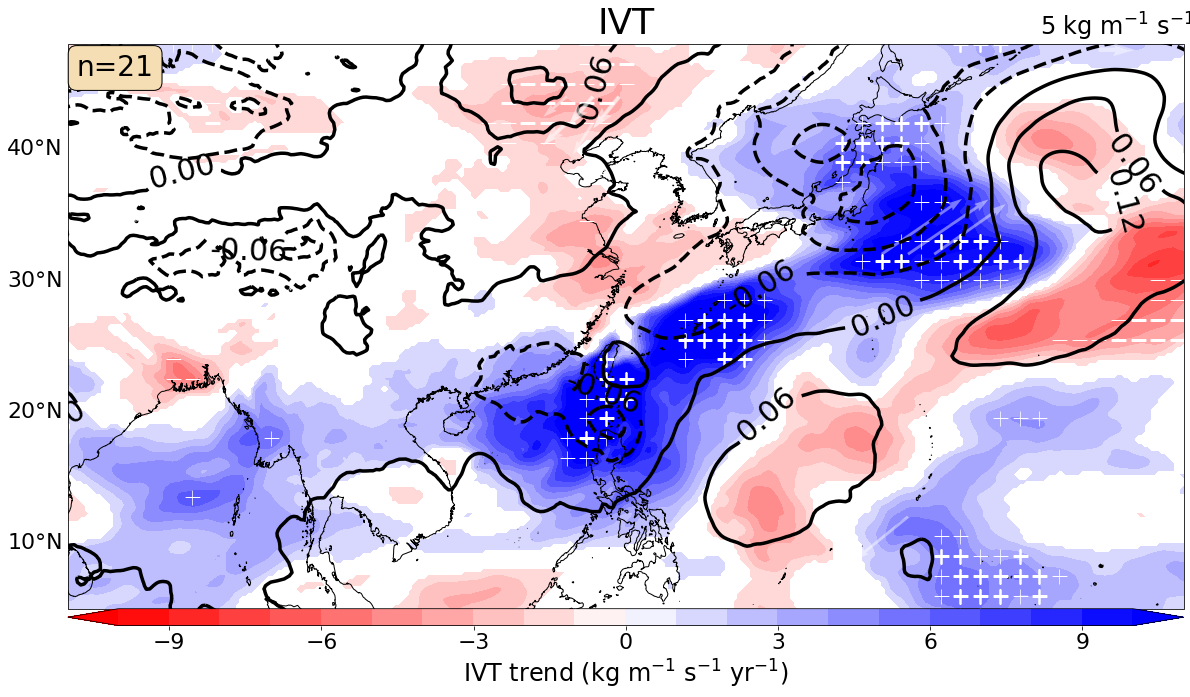

In [52]:
import matplotlib as mpl
month_dict={'1':'January','2':'February','3':'March','4':'April','5':'May','6':'June','7':'July','8':'August','9':'September','10':'October','11':'November','12':'December'}    
proj_map = ccrs.PlateCarree()
fig = plt.figure(figsize=(20,12))
ax=plt.subplot(1,1,1,projection=proj_map)
ax.coastlines(resolution='10m')
countries = cfeature.NaturalEarthFeature(category='cultural',name='admin_0_boundary_lines_land',scale='50m',facecolor='none')
ax.add_feature(countries)
ax.set_extent([80,165,5,48],crs=ccrs.PlateCarree())

# Define gridline locations and draw the lines using cartopy's built-in gridliner:

xticks = [85,95,105,115,125,135,145,155]
yticks = [15,25,35],
ax.tick_params(labelsize=20)
g1=ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,alpha=0)
g1.xformatter=LONGITUDE_FORMATTER
g1.yformatter=LATITUDE_FORMATTER
g1.xlabel_style={'size':22,'color':'k'}
g1.ylabel_style={'size':22,'color':'k'}
g1.top_labels=False
g1.right_labels=False
g1.bottom_labels=False
Y=6

sigs_array_ivtx_convert5=sigs_array_ivtx.where(sigs_array_ivtx<=0.05)
sigs_array_ivtx_convert5=sigs_array_ivtx_convert5/sigs_array_ivtx_convert5
sigs_array_ivty_convert5=sigs_array_ivty.where(sigs_array_ivty<=0.05)
sigs_array_ivty_convert5=sigs_array_ivty_convert5/sigs_array_ivty_convert5

sigs_array_ivtx_convert10=sigs_array_ivtx.where(sigs_array_ivtx<=0.10)
sigs_array_ivtx_convert10=sigs_array_ivtx_convert10/sigs_array_ivtx_convert10
sigs_array_ivty_convert10=sigs_array_ivty.where(sigs_array_ivty<=0.10)
sigs_array_ivty_convert10=sigs_array_ivty_convert10/sigs_array_ivty_convert10


sigs_array_u=sigs_array_ivtx_convert5
sigs_array_v=sigs_array_ivty_convert5
sigs_array_u10=sigs_array_ivtx_convert10
sigs_array_v10=sigs_array_ivty_convert10

slopes_array_u=slopes_array_ivtx
slopes_array_v=slopes_array_ivty

sig_uv=sigs_array_u+sigs_array_v
sig_uv10=sigs_array_u10+sigs_array_v10

sig_uv=sig_uv.fillna(0)
sig_uv10=sig_uv10.fillna(0)

X=8
slopes_array_u10_select=slopes_array_u.where(sig_uv10>0)
slopes_array_v10_select=slopes_array_v.where(sig_uv10>0)
q=ax.quiver(ivtx.longitude[0::X].values,ivtx.latitude[0::X].values,slopes_array_u10_select[0::X,0::X].values,slopes_array_v10_select[0::X,0::X].values,transform=ccrs.PlateCarree(),units='inches',color='w',scale=10,width=0.04,alpha=0.45,zorder=30)

slopes_array_u_select=slopes_array_u.where(sig_uv>0)
slopes_array_v_select=slopes_array_v.where(sig_uv>0)

q=ax.quiver(ivtx.longitude[0::X].values,ivtx.latitude[0::X].values,slopes_array_u_select[0::X,0::X].values,slopes_array_v_select[0::X,0::X].values,transform=ccrs.PlateCarree(),units='inches',color='w',scale=10,width=0.06,alpha=0.45,zorder=30)
ax.quiverkey(q,0.94,0.99,5,'5 kg m$^{-1}$ s$^{-1}$',fontproperties={'size':24})  
                

slopes_array_ivt_pos=slopes_array_ivt.where(slopes_array_ivt>=1)
slopes_array_ivt_neg=slopes_array_ivt.where(slopes_array_ivt<=-1)
cax=ax.contourf(slopes_array_ivt.longitude,slopes_array_ivt.latitude,slopes_array_ivt_pos,transform=ccrs.PlateCarree(),levels=np.arange(-10,11,1),extend='both',cmap=plt.cm.bwr_r)
cax=ax.contourf(slopes_array_ivt.longitude,slopes_array_ivt.latitude,slopes_array_ivt_neg,transform=ccrs.PlateCarree(),levels=np.arange(-10,11,1),extend='both',cmap=plt.cm.bwr_r)

cbar=plt.colorbar(cax,pad=0,fraction=0.03,aspect=60,orientation='horizontal')
cbar.set_label('IVT trend (kg m$^{-1}$ s$^{-1}$ yr$^{-1}$)',fontsize=24,labelpad=5)
cbar.ax.tick_params(labelsize=22)

slp_means_all=slp_days.mean(dim='time',skipna=True)


c=ax.contour(slopes_array_slp.longitude,slopes_array_slp.latitude,slopes_array_slp/100.,linewidths=3.5,transform=ccrs.PlateCarree(),colors='k',levels=np.arange(-0.3,0.36,0.06),zorder=31)


plt.clabel(c,inline=True,fmt='%.02f',fontsize=30)

ax.set_title('IVT',fontsize=36,pad=10)
X=4
#q=ax.quiver(u_mean.longitude[0::X].values,u_mean.latitude[0::X].values,u_mean[0::X,0::X].values,v_mean[0::X,0::X].values,transform=ccrs.PlateCarree(),units='inches',scale=40,width=0.015,alpha=0.5)
#ax.quiverkey(q,0.94,1.01,10,'10 m/s',fontproperties={'size':16})
      
for i in range(int(slopes_array_ivt.longitude.size/Y)):
    for j in range(int(slopes_array_ivt.latitude.size/Y)):
        if sigs_array_ivt[Y*j,Y*i]<=0.05:
            if slopes_array_ivt[Y*j,Y*i].values>0:
                ax.plot(slopes_array_ivt.longitude.values[Y*i],slopes_array_ivt.latitude.values[Y*j],transform=ccrs.PlateCarree(),marker='+',color='w',mew=2.5,markersize=15,markerfacecolor="None")
            else:
                ax.plot(slopes_array_ivt.longitude.values[Y*i],slopes_array_ivt.latitude.values[Y*j],transform=ccrs.PlateCarree(),marker='_',color='w',mew=2.5,markersize=15,markerfacecolor="None")
        elif sigs_array_ivt[Y*j,Y*i]<=0.10:
            if slopes_array_ivt[Y*j,Y*i].values>0:
                ax.plot(slopes_array_ivt.longitude.values[Y*i],slopes_array_ivt.latitude.values[Y*j],transform=ccrs.PlateCarree(),marker='+',color='w',mew=0.75,markersize=15,markerfacecolor="None")
            else:
                ax.plot(slopes_array_ivt.longitude.values[Y*i],slopes_array_ivt.latitude.values[Y*j],transform=ccrs.PlateCarree(),marker='_',color='w',mew=0.75,markersize=15,markerfacecolor="None")


mpl.rcParams['hatch.linewidth']=0.01
props = dict(boxstyle='round', facecolor='wheat', alpha=1.0)
ax.text(0.008, 0.9825,'n='+str(len(dates_tc)), transform=ax.transAxes, fontsize=28,verticalalignment='top', bbox=props,zorder=40)
plt.show()

In [45]:
fig.savefig(dir+'taiwan_paper_event_changes_3.png')